In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statannotations.Annotator import Annotator

In [13]:
# search all directories and subdirectories for choice.csv files

# create a list of all directories with choice.csv files
choice_dirs = []
for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith("choice.csv"):
            choice_dirs.append(root)

# ensure each directory also has a mch_reward.csv and oct_reward.csv file, if not remove from list
for choice_dir in choice_dirs:
    if not os.path.isfile(os.path.join(choice_dir, "mch_reward.csv")):
        choice_dirs.remove(choice_dir)
    if not os.path.isfile(os.path.join(choice_dir, "oct_reward.csv")):
        choice_dirs.remove(choice_dir)

In [14]:
# find all directories with FRBR in the name
frbr_dirs = list(filter(lambda x: "FRBR" in x, choice_dirs))

# find all directories with DFOSCQBR in the name
dfoscqbr_dirs = list(filter(lambda x: "DFOSCQBR" in x, choice_dirs))

In [15]:
frbr_dirs

['.\\2022-09-19\\20220919T165553_Y-Arena1_Cam0_FRBR_exp1_2',
 '.\\2022-09-19\\20220919T214050_Y-Arena1_Cam0_FRBR_exp2_fly1',
 '.\\2022-09-20\\20220920T002358_Y-Arena1_Cam0_FRBR_exp3_fly1',
 '.\\2022-09-20\\20220920T101827_Y-Arena1_Cam0_FRBR_exp4_fly1',
 '.\\2022-09-20\\20220920T143307_Y-Arena1_Cam0_FRBR_exp5_fly1',
 '.\\2022-09-20\\20220920T164916_Y-Arena1_Cam0_FRBR_exp6_fly1',
 '.\\2022-09-20\\20220920T195959_Y-Arena1_Cam0_FRBR_exp7_fly1',
 '.\\2022-09-20\\20220920T224236_Y-Arena1_Cam0_FRBR_exp8_fly1',
 '.\\2022-09-21\\20220921T005019_Y-Arena1_Cam0_FRBR_exp9_fly1',
 '.\\2022-09-21\\20220921T100520_Y-Arena1_Cam0_FRBR_exp10_fly1',
 '.\\2022-10-08\\20221008T131556_Y-Arena1_Cam0_FRBR_exp11_Fly3',
 '.\\2022-10-08\\20221008T152402_Y-Arena1_Cam0_FRBR_exp12_Fly1',
 '.\\2022-10-08\\20221008T182015_Y-Arena1_Cam0_FRBR_exp13_Fly2',
 '.\\2022-10-09\\20221009T235450_Y-Arena1_Cam0_FRBR_exp14_fly1',
 '.\\2022-10-10\\20221010T041647_Y-Arena1_Cam0_FRBR_exp15_fly1',
 '.\\2022-10-10\\20221010T162105_Y-Ar

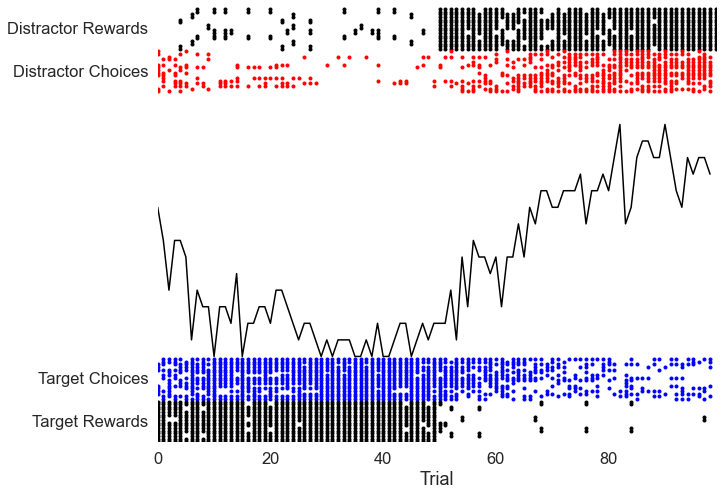

In [16]:
## FOR FRBR

# get experiment name from directory name
frbr_names = list(map(lambda x: int(x.split("_")[-2].split("exp")[1]), frbr_dirs))

# plot the schedule for each experiment
sns.set(style="white", font_scale=1.5)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

interval = 0.01
n = len(frbr_dirs)

frbr_choices = np.zeros((n, 99))
for i,frbr_dir in enumerate(frbr_dirs):
    # load the choice data
    choice_data = np.loadtxt(os.path.join(frbr_dir, "choice.csv"), delimiter=",")
    # load the reward data
    mch_reward_data = np.loadtxt(os.path.join(frbr_dir, "mch_reward.csv"), delimiter=",")
    oct_reward_data = np.loadtxt(os.path.join(frbr_dir, "oct_reward.csv"), delimiter=",")
    # plot the schedule
    if frbr_names[i]%2 == 0:
        ax.plot(np.where(choice_data == 0)[0],np.zeros(np.where(choice_data == 0)[0].shape) + interval*i + interval*n, ".", color="blue")
        ax.plot(np.where(choice_data == 1)[0],np.ones(np.where(choice_data == 1)[0].shape) + interval*i + interval*n*2, ".", color="red")
        frbr_choices[i,:] = choice_data
        # plot the reward
        ax.plot(np.where(mch_reward_data == 1)[0],np.zeros(np.where(mch_reward_data == 1)[0].shape) + interval*i, ".", color="black")
        ax.plot(np.where(oct_reward_data == 1)[0],np.ones(np.where(oct_reward_data == 1)[0].shape) + interval*i + interval*n*2 + interval*n, ".", color="black")
    else:
        ax.plot(np.where(choice_data == 0)[0],np.ones(np.where(choice_data == 0)[0].shape) + interval*i + interval*n*2, ".", color="red")
        ax.plot(np.where(choice_data == 1)[0],np.zeros(np.where(choice_data == 1)[0].shape) + interval*i + interval*n, ".", color="blue")
        frbr_choices[i,:] = 1-choice_data
        # plot the reward
        ax.plot(np.where(mch_reward_data == 1)[0],np.ones(np.where(mch_reward_data == 1)[0].shape) + interval*i + interval*n*2 + interval*n, ".", color="black")
        ax.plot(np.where(oct_reward_data == 1)[0],np.zeros(np.where(oct_reward_data == 1)[0].shape) + interval*i, ".", color="black")
# plot the average choice
ax.plot(np.mean(frbr_choices, axis=0)+interval*n*2, color="black")
ax.set_xlim(0, 99)
ax.set_ylim(0, 1+interval*n*4)
ax.set_yticks([interval*(n//2), interval*(n//2)*3, 1+interval*(n//2)+interval*n*2, 1+interval*(n//2)*3+interval*n*2])
ax.set_yticklabels(["Target Rewards", "Target Choices", "Distractor Choices","Distractor Rewards"])
ax.set_xlabel("Trial")
plt.box(False)
plt.show()


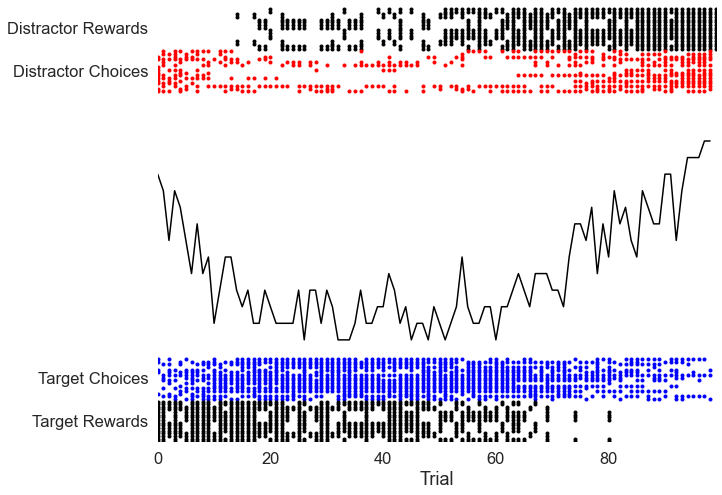

In [17]:
## FOR DFOSCQBR

# get experiment name from directory name
dfoscqbr_names = list(map(lambda x: int(x.split("_")[-2].split("exp")[1]), dfoscqbr_dirs))

# plot the schedule for each experiment
sns.set(style="white", font_scale=1.5)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

interval = 0.01
n = len(dfoscqbr_dirs)

dfoscqbr_choices = np.zeros((n, 99))
for i,dfoscqbr_dir in enumerate(dfoscqbr_dirs):
    # load the choice data
    choice_data = np.loadtxt(os.path.join(dfoscqbr_dir, "choice.csv"), delimiter=",")
    # load the reward data
    mch_reward_data = np.loadtxt(os.path.join(dfoscqbr_dir, "mch_reward.csv"), delimiter=",")
    oct_reward_data = np.loadtxt(os.path.join(dfoscqbr_dir, "oct_reward.csv"), delimiter=",")
    # plot the schedule
    if dfoscqbr_names[i]%2 == 0:
        ax.plot(np.where(choice_data == 0)[0],np.zeros(np.where(choice_data == 0)[0].shape) + interval*i + interval*n, ".", color="blue")
        ax.plot(np.where(choice_data == 1)[0],np.ones(np.where(choice_data == 1)[0].shape) + interval*i + interval*n*2, ".", color="red")
        dfoscqbr_choices[i,:] = choice_data
        # plot the reward
        ax.plot(np.where(mch_reward_data == 1)[0],np.zeros(np.where(mch_reward_data == 1)[0].shape) + interval*i, ".", color="black")
        ax.plot(np.where(oct_reward_data == 1)[0],np.ones(np.where(oct_reward_data == 1)[0].shape) + interval*i + interval*n*2 + interval*n, ".", color="black")
    else:
        ax.plot(np.where(choice_data == 0)[0],np.ones(np.where(choice_data == 0)[0].shape) + interval*i + interval*n*2, ".", color="red")
        ax.plot(np.where(choice_data == 1)[0],np.zeros(np.where(choice_data == 1)[0].shape) + interval*i + interval*n, ".", color="blue")
        dfoscqbr_choices[i,:] = 1-choice_data
        # plot the reward
        ax.plot(np.where(mch_reward_data == 1)[0],np.ones(np.where(mch_reward_data == 1)[0].shape) + interval*i + interval*n*2 + interval*n, ".", color="black")
        ax.plot(np.where(oct_reward_data == 1)[0],np.zeros(np.where(oct_reward_data == 1)[0].shape) + interval*i, ".", color="black")
# plot the average choice
ax.plot(np.mean(dfoscqbr_choices, axis=0)+interval*n*2, color="black")
ax.set_xlim(0, 99)
ax.set_ylim(0, 1+interval*n*4)
ax.set_yticks([interval*(n//2), interval*(n//2)*3, 1+interval*(n//2)+interval*n*2, 1+interval*(n//2)*3+interval*n*2])
ax.set_yticklabels(["Target Rewards", "Target Choices", "Distractor Choices","Distractor Rewards"])
ax.set_xlabel("Trial")
plt.box(False)
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FRBR vs. DFOSCQBR: Mann-Whitney-Wilcoxon test two-sided, P_val:2.994e-01 U_stat=1.000e+02


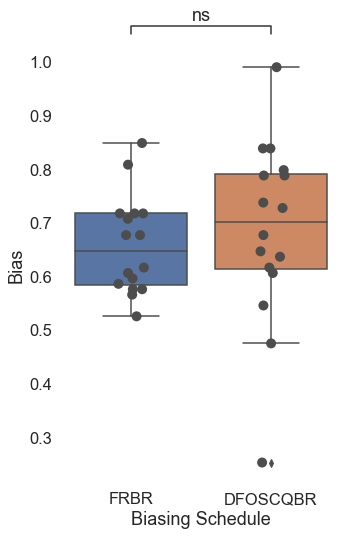

In [25]:
## FOR FRBR
frbr_bias = 1-np.mean(frbr_choices, axis=1)
# frbr_bias = 2*(frbr_bias-0.5)

## FOR DFOSCQBR
dfoscqbr_bias = 1-np.mean(dfoscqbr_choices, axis=1)
# dfoscqbr_bias = 2*(dfoscqbr_bias-0.5)

# create a dataframe for the bias
bias_df = pd.DataFrame({"Bias": np.concatenate((frbr_bias, dfoscqbr_bias)), "Biasing Schedule": np.concatenate((["FRBR"]*len(frbr_bias), ["DFOSCQBR"]*len(dfoscqbr_bias)))})

# drop index 12
# bias_df = bias_df.drop(12)

# plot the bias using seaborn
sns.set(style="white", font_scale=1.5)
fig, ax = plt.subplots(1, 1, figsize=(5, 8))
ax = sns.boxplot(x="Biasing Schedule", y="Bias", data=bias_df, ax=ax)
sns.stripplot(x="Biasing Schedule", y="Bias", data=bias_df, jitter=True, color=".3", ax=ax, size=10)
pairs = [("FRBR", "DFOSCQBR")]

# plot the significance 
annotator = Annotator(ax, pairs, data=bias_df, x="Biasing Schedule", y="Bias")
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.box(False)
plt.show()

In [23]:
bias_df

,Bias,Biasing Schedule
0,0.616162,FRBR
1,0.676768,FRBR
2,0.575758,FRBR
3,0.575758,FRBR
4,0.565657,FRBR
5,0.595960,FRBR
6,0.606061,FRBR
7,0.717172,FRBR
8,0.808081,FRBR
9,0.585859,FRBR


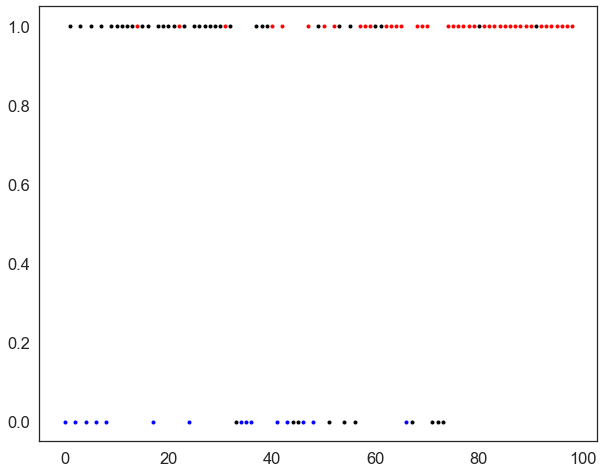

In [98]:
test_dir = dfoscqbr_dirs[2]
# load the choice data
choice_data = np.loadtxt(os.path.join(test_dir, "choice.csv"), delimiter=",")
# load the reward data
mch_reward_data = np.loadtxt(os.path.join(test_dir, "mch_reward.csv"), delimiter=",")[:99]
oct_reward_data = np.loadtxt(os.path.join(test_dir, "oct_reward.csv"), delimiter=",")[:99]

# plot the schedule
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
oct_rewarded_trials = np.where(np.logical_and(oct_reward_data == 1, choice_data == 1))[0]
mch_rewarded_trials = np.where(np.logical_and(mch_reward_data == 1, choice_data == 0))[0]
oct_unrewarded_trials = np.where(np.logical_and(oct_reward_data == 0, choice_data == 1))[0]
mch_unrewarded_trials = np.where(np.logical_and(mch_reward_data == 0, choice_data == 0))[0]

ax.plot(oct_rewarded_trials, np.zeros(oct_rewarded_trials.shape), ".", color="blue")
ax.plot(mch_rewarded_trials, np.ones(mch_rewarded_trials.shape), ".", color="red")
ax.plot(oct_unrewarded_trials, np.zeros(oct_unrewarded_trials.shape), ".", color="black")
ax.plot(mch_unrewarded_trials, np.ones(mch_unrewarded_trials.shape), ".", color="black")

In [100]:
for dfoscqbr_dir in dfoscqbr_dirs:
    mch_reward_data = np.loadtxt(os.path.join(dfoscqbr_dir, "mch_reward.csv"), delimiter=",")[:99]
    print(mch_reward_data[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]
